In [11]:
import os
#os.chdir('/projects/modeslab/data_version_2/CF_mutant/') #
#os.chdir('/projects/modeslab/data_version_3/CF_only/') #
os.chdir('../data/CF_only_postprocess/')

from CF_methods import *


In [2]:
if glob.glob('dfs/combined_summed_prop_per_timepoint.csv'): 
    df = pd.read_csv('dfs/combined_summed_prop_per_timepoint.csv')
else: 
    print("combining all sims")
    glob_path = "*/"
    for i, path in enumerate(glob.glob(glob_path)):
        try: 
            df_temp = pd.read_csv(path + '/summed_prop_per_timepoint.csv')
        except: 
            print('files corrupted or empty path: ' + path)
            continue
        #split path name (path name will be split by numerical values)
        #to get all parameter names
        param_names = re.split(r'_[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?_*', path.split('/')[-2])
        #usually get an empty string as a result of splitting
        if '' in param_names:
            param_names.remove('')
        #for each param name, grab its value
        for param in param_names:   
            param_val = re.findall(param + '_[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?_*', path)
            val = float(re.findall('[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?', param_val[0])[-1])
            #for each param, make a column in the dataframe and save the parameter value there
            df_temp[param] = val
        df_temp["path"] = path
        if i == 0:
            df = df_temp
        else: 
            df = pd.concat(
                            [df, df_temp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
    os.makedirs("dfs/", exist_ok = True)
    df.to_csv('dfs/combined_summed_prop_per_timepoint.csv',index = False)
    
df_orig = df.copy(deep = True)

In [3]:
groupby_cols = ["K", "germ_band_push", "t", "int_curvature_CF"]
grouped_df = df.groupby(groupby_cols).agg(["mean", "std"]).reset_index()
colnames = [x[0] if ((x[1] == "mean") or (x[0] in groupby_cols)) else x[0]+'_'+x[1] for x in grouped_df.columns]
grouped_df.columns = colnames #removing multi-indexing


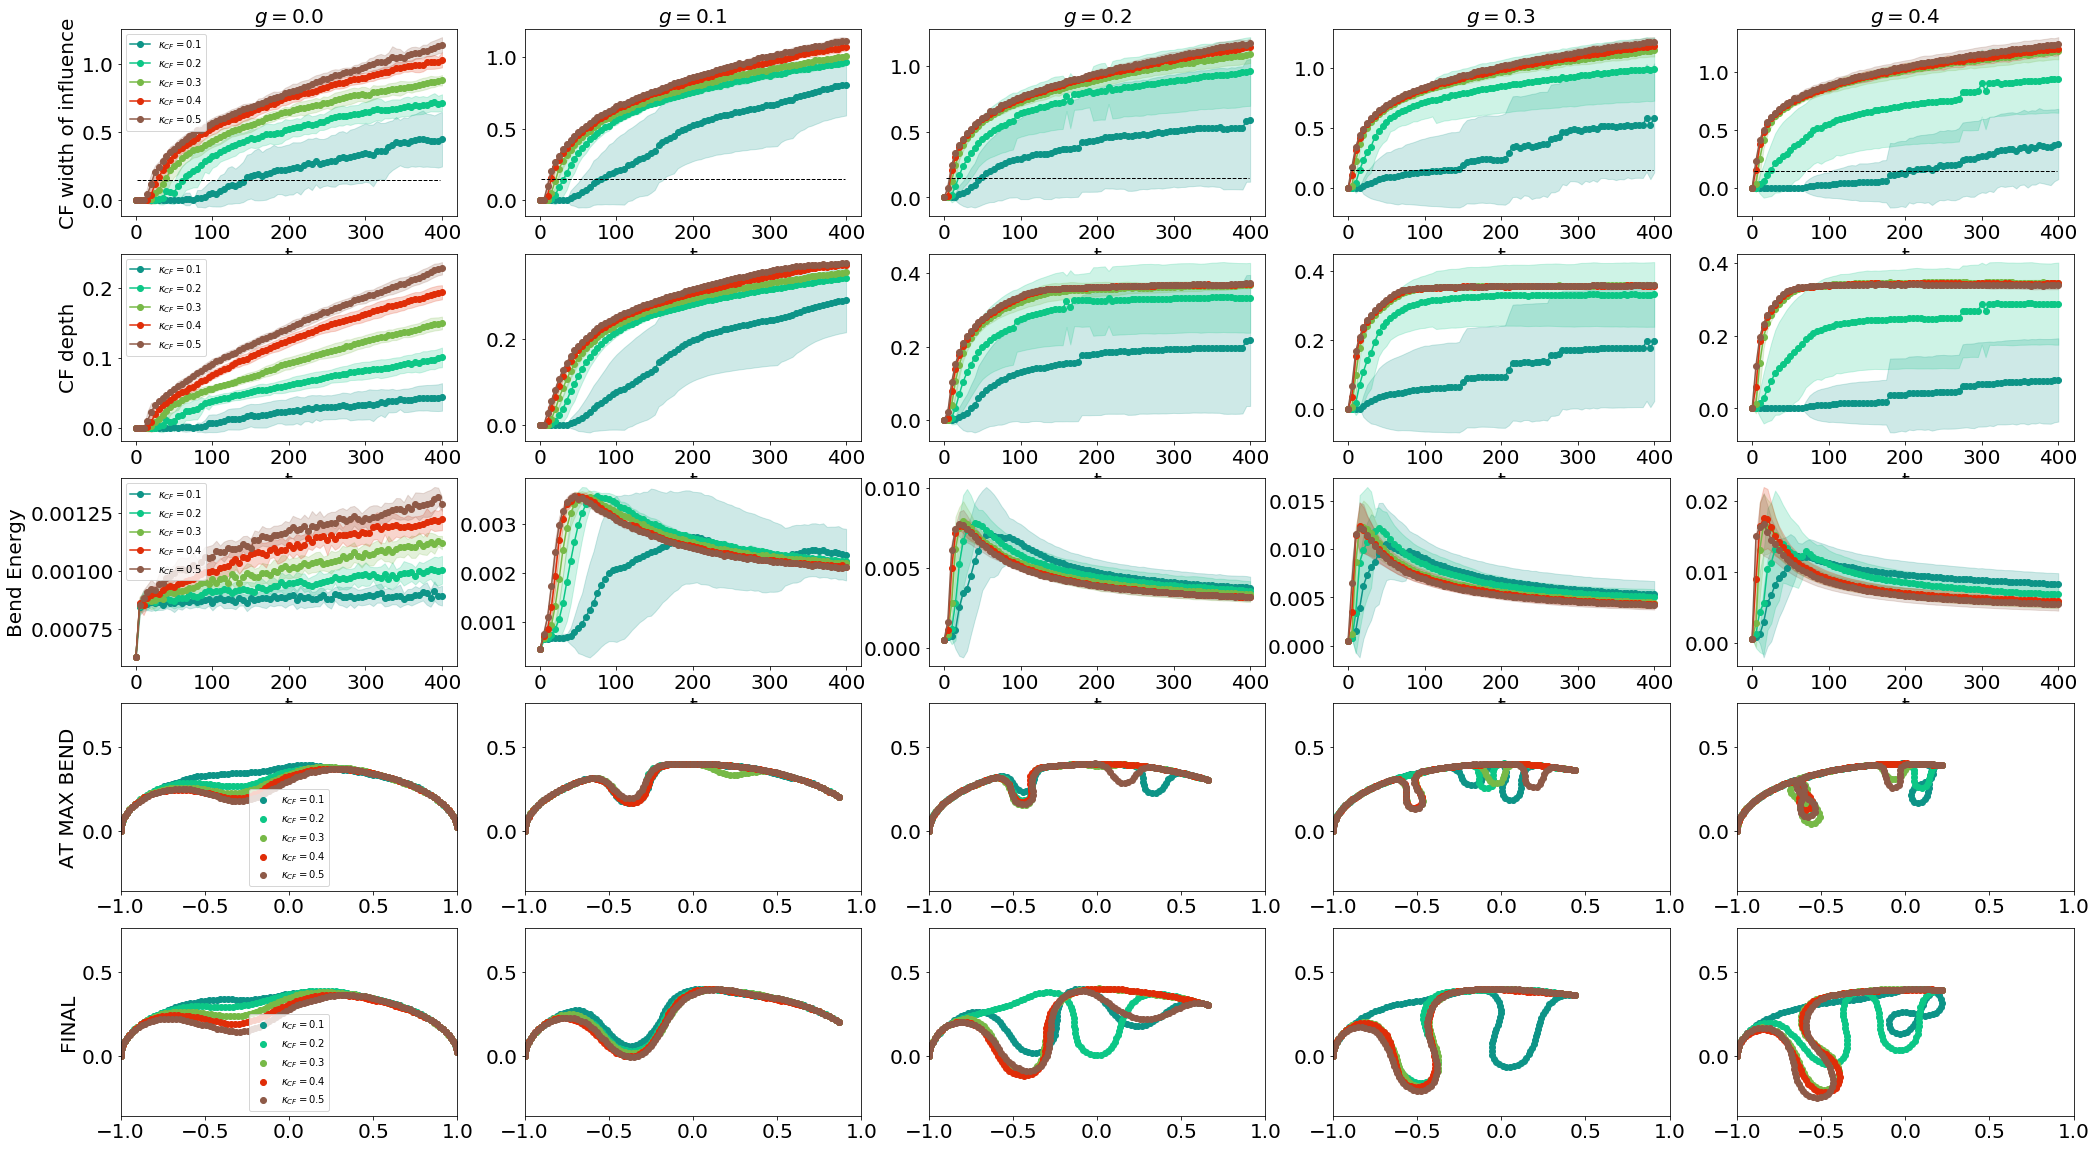

In [4]:
%matplotlib inline

Ks = np.sort(np.unique(grouped_df["K"]))
K = 8e-5

int_curvature_CFs = np.sort(np.unique(grouped_df["int_curvature_CF"]))

np.random.seed(47)
colors_func = lambda n: list(map(lambda i: "#" + "%06x" % np.random.randint(0, 0xFFFFFF),range(n)))
colors = colors_func(len(int_curvature_CFs))

y_col = "CF_area_of_influence_ref"
y_label = "CF width of influence"
yerr = y_col + "_std"

gs = np.sort(np.unique(grouped_df["germ_band_push"]))
ncols = len(gs)
fig, axs = plt.subplots(5, ncols, figsize=(7*ncols, 20))

for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[0,i]
    ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[((grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)) & (grouped_df["germ_band_push"] == g)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()

y_col = "CF_depth"
y_label = "CF depth"
yerr = y_col + "_std"

for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[1,i]
    #ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[((grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)) & (grouped_df["germ_band_push"] == g)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()

y_col = "bend_energy"
y_label = "Bend Energy"
yerr = y_col + "_std"

for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[2,i]
    #ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[((grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)) & (grouped_df["germ_band_push"] == g)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()


        
for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[3,i]
    #ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = df[((df["K"] == K) & (df["int_curvature_CF"] == kappa)) & (df["germ_band_push"] == g)]
        path = np.random.choice(df_temp["path"])
        df_temp = pd.read_csv(path + "summed_prop_per_timepoint.csv")
        t_maxBendEnergy = df_temp[df_temp["bend_energy"] == max(df_temp["bend_energy"])]["t"].values[0]
        df_temp = pd.read_csv(path + "database.csv")
        #df_temp = df_temp[df_temp["t"] == max(df_temp["t"])]
        df_temp = df_temp[df_temp["t"] == t_maxBendEnergy]
        
        ax.scatter(df_temp["x"], df_temp["y"], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        #ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        #ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel("AT MAX BEND", fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.axis("equal")
        
        ax.set_xlim(-1,1)
        ax.set_ylim(-0.1,0.5)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()
        
for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[4,i]
    #ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = df[((df["K"] == K) & (df["int_curvature_CF"] == kappa)) & (df["germ_band_push"] == g)]
        path = np.random.choice(df_temp["path"])
        #df_temp = pd.read_csv(path + "summed_prop_per_timepoint.csv")
        #t_maxBendEnergy = df_temp[df_temp["bend_energy"] == max(df_temp["bend_energy"])]["t"]
        df_temp = pd.read_csv(path + "database.csv")
        df_temp = df_temp[df_temp["t"] == max(df_temp["t"])]
        #df_temp = df_temp[df_temp["t"] == t_maxBendEnergy]
        
        ax.scatter(df_temp["x"], df_temp["y"], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        #ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        #ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel("FINAL", fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.axis("equal")
        
        ax.set_xlim(-1,1)
        ax.set_ylim(-0.1,0.5)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()
        

        
os.makedirs("plots/", exist_ok=True)
fig.savefig("plots/" + y_col + "_K_" + str(K) + ".pdf", bbox_inches = "tight")

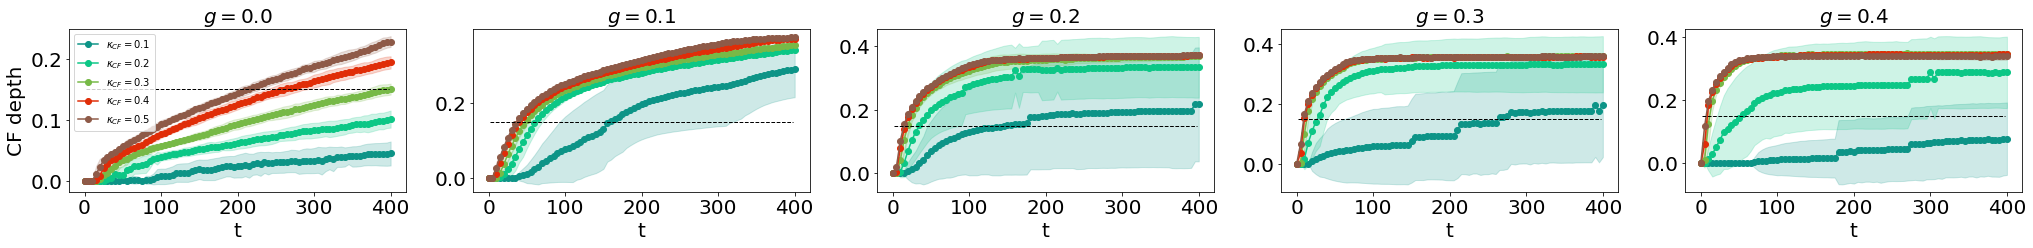

In [5]:
%matplotlib inline

Ks = np.sort(np.unique(grouped_df["K"]))
K = 8e-5

int_curvature_CFs = np.sort(np.unique(grouped_df["int_curvature_CF"]))

np.random.seed(47)
colors_func = lambda n: list(map(lambda i: "#" + "%06x" % np.random.randint(0, 0xFFFFFF),range(n)))
colors = colors_func(len(int_curvature_CFs))

y_col = "CF_depth"
y_label = "CF depth"
yerr = y_col + "_std"

gs = np.sort(np.unique(grouped_df["germ_band_push"]))
ncols = len(gs)
fig, axs = plt.subplots(1, ncols, figsize=(7*ncols, 3))

for i in range(ncols):
    
    g = gs[i]
    #fig,ax = plt.subplots()
    ax = axs[i]
    ax.set_title(r"$g = $" + str(g), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[((grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)) & (grouped_df["germ_band_push"] == g)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        if i == 0:
            ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    if i == 0:
        ax.legend()
os.makedirs("plots/", exist_ok=True)
fig.savefig("plots/" + y_col + "_K_" + str(K) + ".pdf", bbox_inches = "tight")

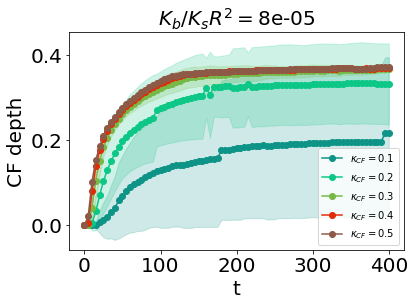

In [6]:
%matplotlib inline

grouped_df = grouped_df[grouped_df["germ_band_push"] == 0.2]
Ks = np.sort(np.unique(grouped_df["K"]))
int_curvature_CFs = np.sort(np.unique(grouped_df["int_curvature_CF"]))

np.random.seed(47)
colors_func = lambda n: list(map(lambda i: "#" + "%06x" % np.random.randint(0, 0xFFFFFF),range(n)))
colors = colors_func(len(int_curvature_CFs))

y_col = "CF_depth"
y_label = "CF depth"
yerr = y_col + "_std"

for i in range(len(Ks)):
    K = Ks[i]
    
    fig,ax = plt.subplots()
    ax.set_title(r"$K_b/K_sR^2 = $" + str(K), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[(grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    ax.legend()
    os.makedirs("plots/", exist_ok=True)
    fig.savefig("plots/" + y_col + "_K_" + str(K) + ".pdf", bbox_inches = "tight")

In [8]:
%matplotlib inline

grouped_df = grouped_df[grouped_df["germ_band_push"] == 0]
Ks = np.sort(np.unique(grouped_df["K"]))
int_curvature_CFs = np.sort(np.unique(grouped_df["int_curvature_CF"]))

np.random.seed(47)
colors_func = lambda n: list(map(lambda i: "#" + "%06x" % np.random.randint(0, 0xFFFFFF),range(n)))
colors = colors_func(len(int_curvature_CFs))

y_col = "nb_folds"
y_label = "Nb folds"
yerr = y_col + "_std"

for i in range(len(Ks)):
    K = Ks[i]
    
    fig,ax = plt.subplots()
    ax.set_title(r"$K_b/K_sR^2 = $" + str(K), fontsize = 20)
    for j in range(len(int_curvature_CFs)):
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = grouped_df[(grouped_df["K"] == K) & (grouped_df["int_curvature_CF"] == kappa)]
        ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        
        ax.set_xlabel("t", fontsize = 20)
        ax.set_ylabel(y_label, fontsize = 20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    ax.legend()
    os.makedirs("plots/", exist_ok=True)
    fig.savefig("plots/" + y_col + "_K_" + str(K) + ".pdf", bbox_inches = "tight")

In [9]:
if glob.glob('dfs/combined_final.csv'): 
    df = pd.read_csv('dfs/combined_final.csv')
else: 
    print("combining all sims")
    glob_path = "*/"
    for i, path in enumerate(glob.glob(glob_path)):
        try: 
            df_temp = pd.read_csv(path + '/final.csv')
        except: 
            print('files corrupted or empty path: ' + path)
            continue
        #split path name (path name will be split by numerical values)
        #to get all parameter names
        param_names = re.split(r'_[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?_*', path.split('/')[-2])
        #usually get an empty string as a result of splitting
        if '' in param_names:
            param_names.remove('')
        #for each param name, grab its value
        for param in param_names:   
            param_val = re.findall(param + '_[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?_*', path)
            val = float(re.findall('[+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?', param_val[0])[-1])
            #for each param, make a column in the dataframe and save the parameter value there
            df_temp[param] = val
        df_temp["path"] = path
        if i == 0:
            df = df_temp
        else: 
            df = pd.concat(
                            [df, df_temp],
                            axis=0,
                            join="outer",
                            ignore_index=True,
                            keys=None,
                            levels=None,
                            names=None,
                            verify_integrity=False,
                            copy=True,
                        )
    os.makedirs("dfs/", exist_ok = True)
    df.to_csv('dfs/combined_final.csv',index = False)
    
df_final = df.copy(deep = True)

In [10]:
groupby_cols = ["K", "germ_band_push", "ID", "int_curvature_CF"]
grouped_final = df_final.groupby(groupby_cols).agg(["mean", "std"]).reset_index()
colnames = [x[0] if ((x[1] == "mean") or (x[0] in groupby_cols)) else x[0]+'_'+x[1] for x in grouped_final.columns]

KeyError: 'ID'

In [ ]:
%matplotlib inline

#grouped_final = grouped_final[grouped_final["germ_band_push"] == 0]
Ks = np.sort(np.unique(grouped_final["K"]))
int_curvature_CFs = np.sort(np.unique(grouped_final["int_curvature_CF"]))

np.random.seed(47)
colors_func = lambda n: list(map(lambda i: "#" + "%06x" % np.random.randint(0, 0xFFFFFF),range(n)))
colors = colors_func(len(int_curvature_CFs))

for i in range(len(Ks)):
    K = Ks[i]

    fig,ax = plt.subplots()
    ax.set_title(r"$K_b/K_sR^2 = $" + str(K), fontsize = 20)
    
    for j in range(len(int_curvature_CFs)):
        
        kappa = int_curvature_CFs[j]
        color = colors[j]
        
        df_temp = df_final[(df_final["K"] == K) & (df_final["int_curvature_CF"] == kappa)]
        df_temp_stat = df_temp.groupby(["ID"])[["x", "y"]].agg("mean").reset_index()
        #ax.plot(df_temp["t"], df_temp[y_col], marker = 'o', label = r"$\kappa_{CF} = $" + str(kappa), color = color)
        #ax.fill_between(df_temp["t"], df_temp[y_col] - df_temp[yerr], df_temp[y_col] + df_temp[yerr], color = color, alpha = 0.2, zorder = 0)
        ax.plot(df_temp_stat["x"], df_temp_stat["y"], color = color, label = r"$\kappa_{CF} = $" + str(kappa))
        ax.axis("equal")
        #ax.set_xlabel("t", fontsize = 20)
        #ax.set_ylabel(y_label, fontsize = 20)
        #ax.tick_params(axis='both', which='major', labelsize=20)
        
    #ax.axhline(y = 0.15, xmin=0.05, xmax=0.95, linestyle = "--", linewidth = 1, color = "black")
    ax.legend()
    
    ax.set_xlim(-0.7, 0.1)
    ax.set_ylim(0.3, 0.45)
    
    os.makedirs("plots/", exist_ok=True)
    fig.savefig("plots/curves.pdf", bbox_inches = "tight")
    